In [1]:
#Importing Required Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the dar=ta
leads = pd.read_csv(r'C:\Users\abing\Downloads\Lead Scoring Assignment\Leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning

In [7]:
#finding the Null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
leads = leads.loc[:,leads.isnull().mean()<=0.3]
leads.shape

(9240, 31)

In [9]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# dropping these columns as these are not helpful in analysis
leads.drop(['Prospect ID'], axis = 1, inplace = True)
leads.drop(['Lead Number'], axis = 1, inplace = True)

In [11]:
leads.shape

(9240, 29)

In [12]:
#dropping country as 75% of the value is India
leads.drop(['Country'], axis = 1, inplace = True)

In [13]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [14]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [15]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
#droppin the rows as most of the people didn't choose any thing
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)


In [17]:
leads.shape

(9240, 26)

In [18]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [19]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [20]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

In [21]:
#filling NA values with mode value
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0], inplace=True)

In [22]:
leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0], inplace=True)

In [23]:
leads.dropna(subset=['Lead Source'], inplace=True)

In [24]:
leads.dropna(subset=['TotalVisits'], inplace=True)

In [25]:
leads.dropna(subset=['Page Views Per Visit'], inplace=True)

In [26]:
leads.dropna(subset=['Last Activity'], inplace=True)

In [27]:
leads.shape

(9074, 26)

In [28]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

##### Filling NA as not provided and replacing select value with not provided

In [29]:
leads['Specialization'] = leads['Specialization'].fillna('not provided') 

In [30]:
leads['City'] = leads['City'].fillna('not provided') 

In [31]:
leads['City'].value_counts()

Mumbai                         3177
Select                         2156
not provided                   1419
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
leads['City'] = leads['City'].replace(['Select'],'not provided')

In [33]:
leads['Specialization'] = leads['Specialization'].replace(['Select'],'not provided')

In [34]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

## 2. EDA
### 2.1. Univariate Analysis
##### 2.1.1. Categorical Variables

In [35]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

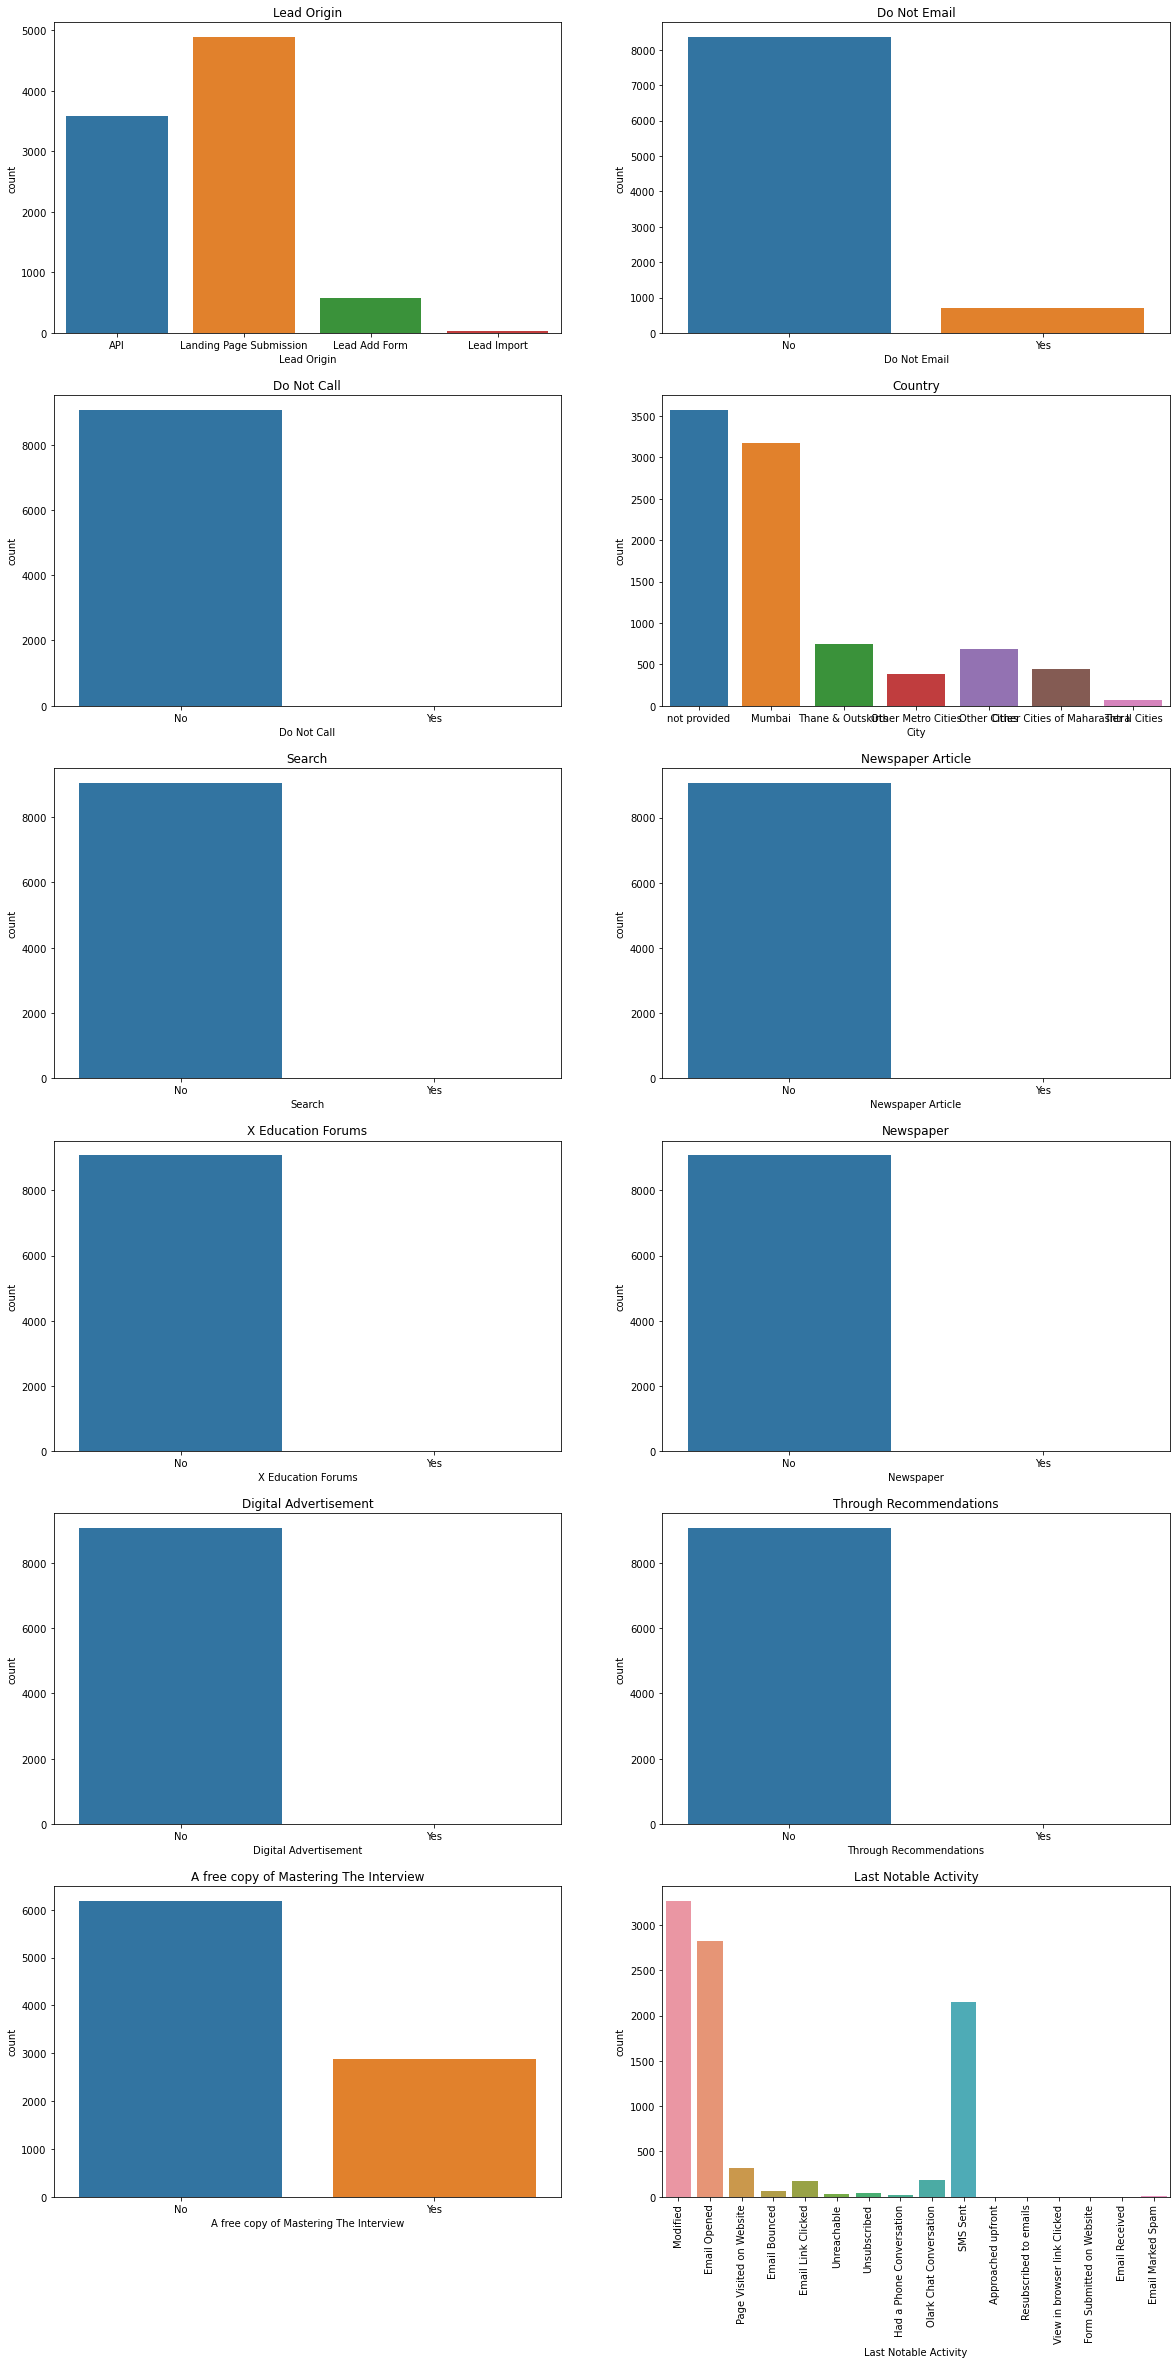

In [36]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads['City'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

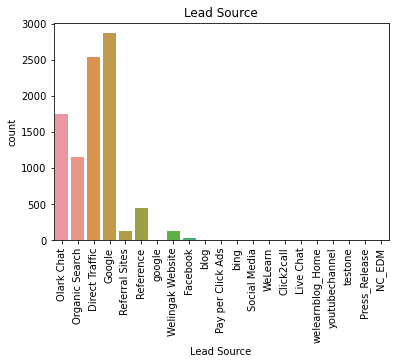

In [37]:
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

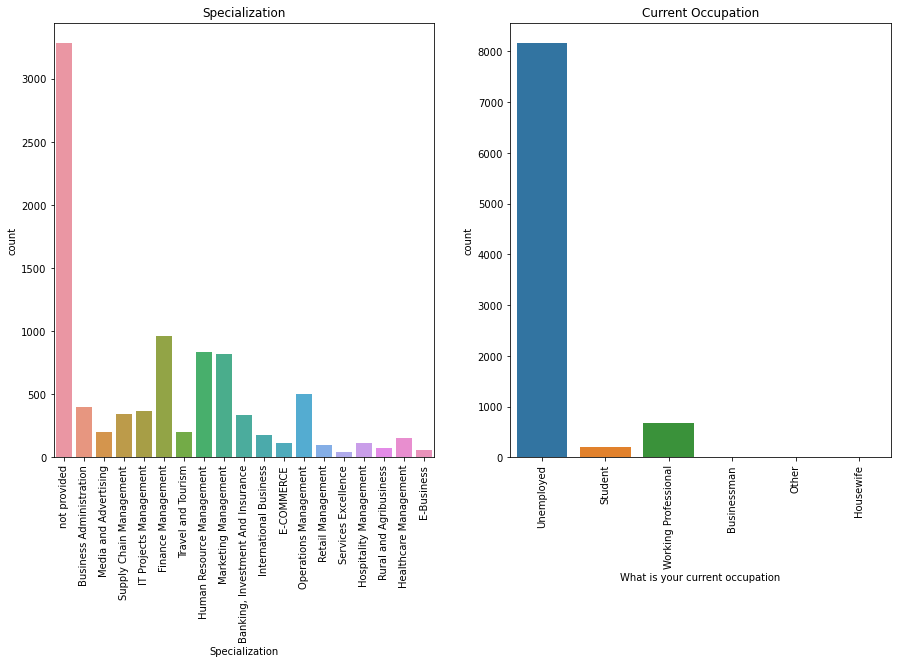

In [38]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
 
                    
sns.countplot(leads['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(1,2,2)
sns.countplot(leads['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.show()

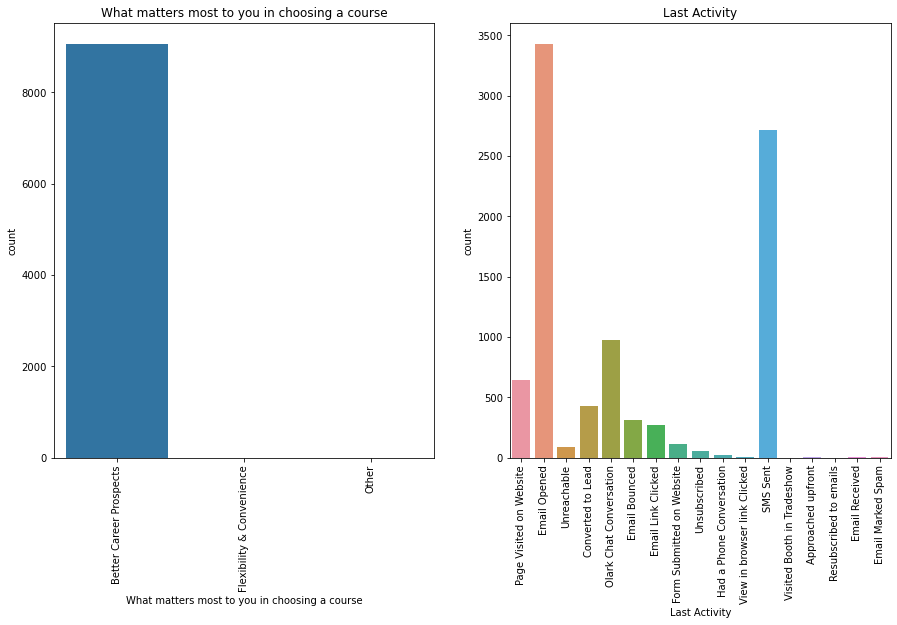

In [39]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(leads['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(1,2,2)
sns.countplot(leads['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

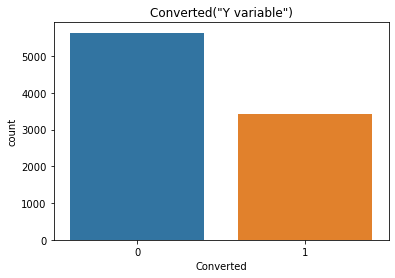

In [40]:
sns.countplot(leads['Converted'])
plt.title('Converted("Y variable")')
plt.show()

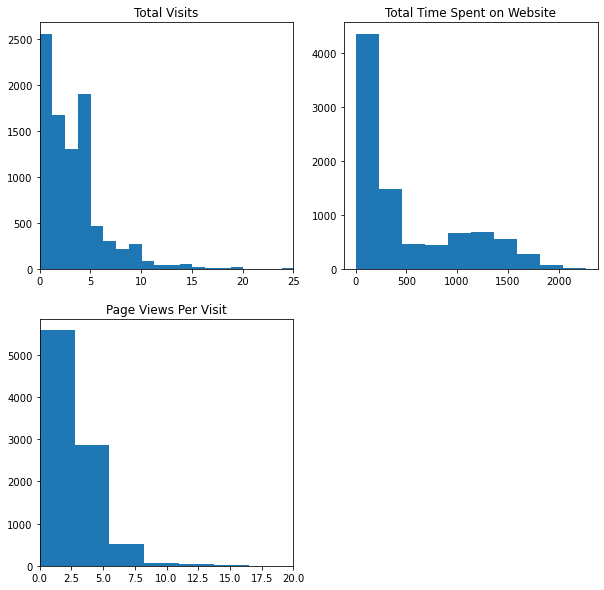

In [41]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

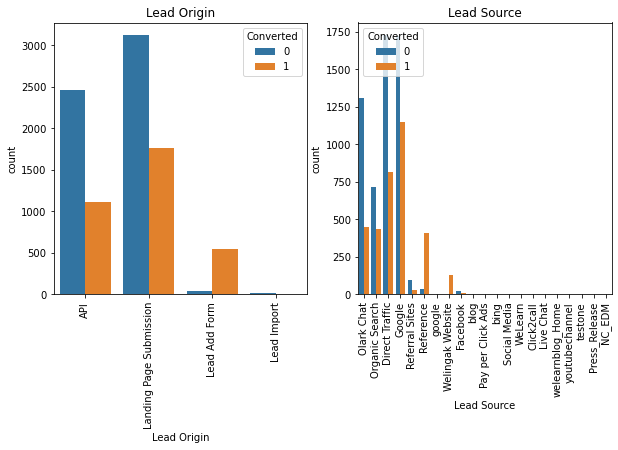

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

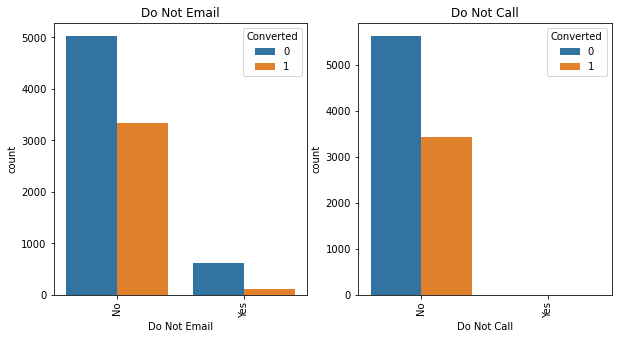

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

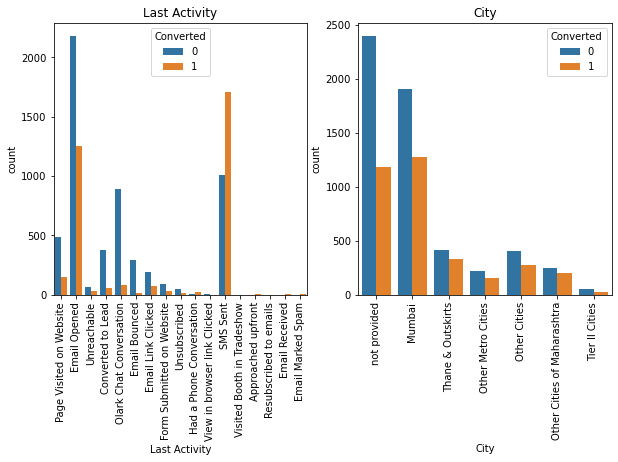

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='City', hue='Converted', data= leads).tick_params(axis='x',rotation = 90)
plt.title('City')
plt.show()

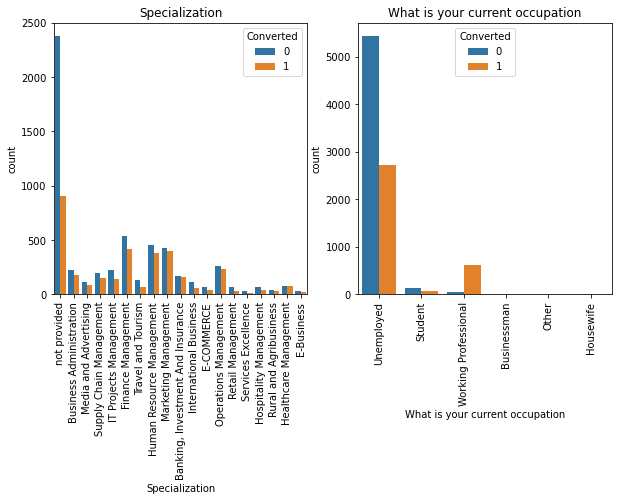

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

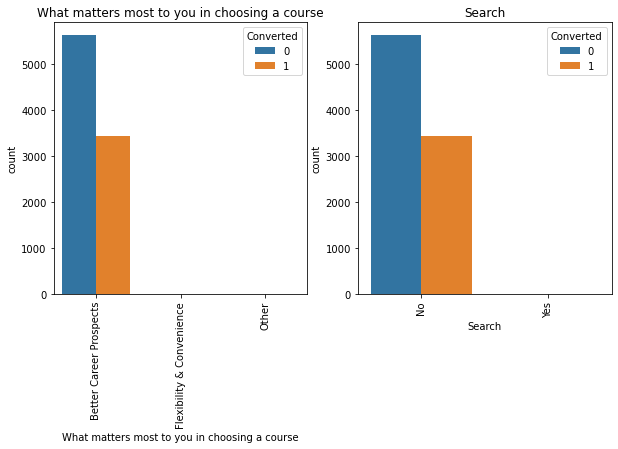

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

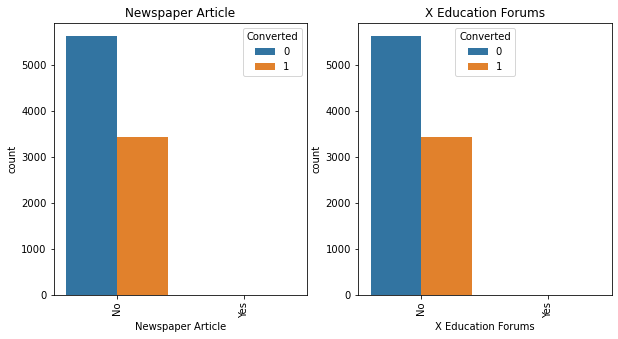

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

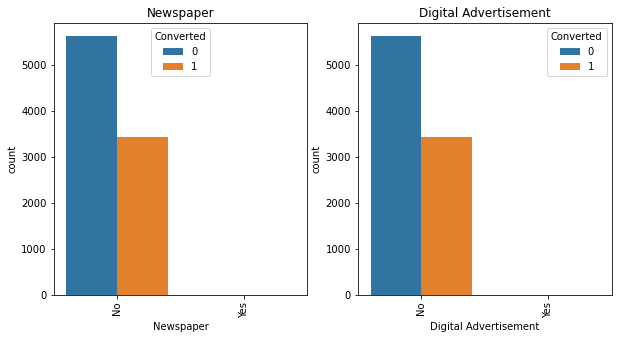

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

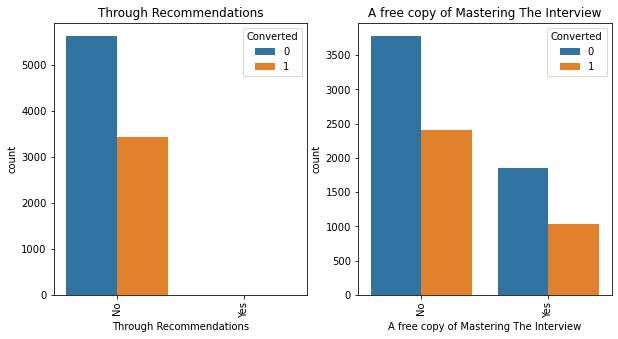

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

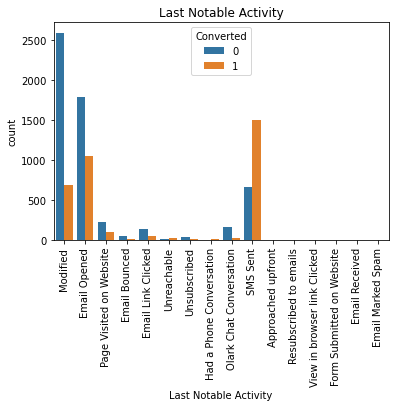

In [50]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

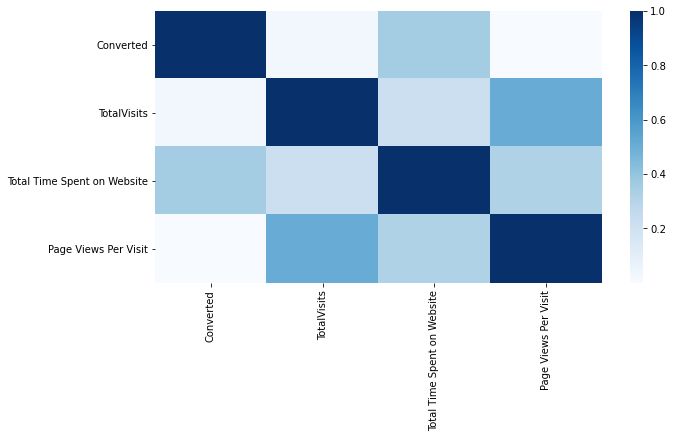

In [51]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(),cmap="Blues")
plt.show()

##### From above heatmap we can clearly see that only numeric variables 'Total Visits',' Total Time Spent on Website', 'Page Views Per Visit' having correlation with Target variable

## Creating Dummy Variables

In [52]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']])

In [54]:
dummy.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# Add the results to the master dataframe
leads_final_dum = pd.concat([leads, dummy], axis=1)
leads_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [56]:
leads_final_dum = leads_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Test-Train Split

In [57]:
# Import the required library
from sklearn.model_selection import train_test_split

In [58]:
X = leads_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# Putting the target variable in y
y = leads_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [61]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 5. Model Building

In [62]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [63]:
# Import RFE
from sklearn.feature_selection import RFE

In [64]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [65]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_API', False, 34),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 83),
 ('Lead Source_Click2call', False, 98),
 ('Lead Source_Direct Traffic', False, 39),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Live Chat', False, 55),
 ('Lead Source_NC_EDM', False, 103),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Pay per Click Ads', False, 102),
 ('Lead Source_Press_Release', False, 64),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 49),
 ('Lead Source_blog', False, 48),
 ('Lead Source_google', False, 41),
 ('Lead 

In [66]:
# Put all the columns selected by RFE in the variable 'col'
colum = X_train.columns[rfe.support_]

In [67]:
# Selecting columns selected by RFE
X_train = X_train[colum]

In [68]:
# Importing statsmodels
import statsmodels.api as sm

In [69]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.9
Date:                Sun, 06 Feb 2022   Deviance:                       5383.8
Time:                        23:00:08   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8337      0.207     -4.034      0.000      -1.239      -0.429
Total Time Spent on Website                              4.0986      0.151     27.160      0.000       3.803       4.394
Lead Origin_Landing Page Submission                     -1.4556      0.120    -12.171      0.000      -1.690      -1.221
Lead Origin_Lead Add Form                                2.9056      0.230     12.659      0.000       2.456       3.355
Lead Source_Welingak Website                             3.2883      1.043      3.154      0.002       1.245       5.332
Do Not Email_No                                          1.6245      0.176      9.207      0.000       1.279       1.970
Last Activity_Approached upfront                        24.4711   2.55e+04      0.001      0.999      -5e+04       5e+04
Last Activity_Had a Phone Conversation                   1.6307      0.713      2.288      0.022       0.234       3.028
Specialization_not provided                             -1.1702      0.122     -9.588      0.000      -1.409      -0.931
What is your current occupation_Housewife               23.1596    1.8e+04      0.001      0.999   -3.52e+04    3.52e+04
What is your current occupation_Working Professional     2.6507      0.198     13.399      0.000       2.263       3.038
Last Notable Activity_Email Link Clicked                -1.8508      0.277     -6.683      0.000      -2.394      -1.308
Last Notable Activity_Email Opened                      -1.3616      0.087    -15.677      0.000      -1.532      -1.191
Last Notable Activity_Modified                          -2.0337      0.092    -22.081      0.000      -2.214      -1.853
Last Notable Activity_Olark Chat Conversation           -2.6481      0.346     -7.653      0.000      -3.326      -1.970
Last Notable Activity_Page Visited on Website           -1.6728      0.193     -8.662      0.000      -2.051      -1.294
========================================================================================================================
"""

In [70]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_No,7.83
1,Lead Origin_Landing Page Submission,4.05
7,Specialization_not provided,3.13
12,Last Notable Activity_Modified,2.24
11,Last Notable Activity_Email Opened,2.23
0,Total Time Spent on Website,2.04
2,Lead Origin_Lead Add Form,1.60
3,Lead Source_Welingak Website,1.35
9,What is your current occupation_Working Profes...,1.20
14,Last Notable Activity_Page Visited on Website,1.12


In [72]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [73]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.8
Date:                Sun, 06 Feb 2022   Deviance:                       5393.7
Time:                        23:00:09   Pearson chi2:                 6.58e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8350      0.207     -4.041      0.000      -1.240      -0.430
Total Time Spent on Website                              4.0940      0.151     27.155      0.000       3.798       4.389
Lead Origin_Landing Page Submission                     -1.4526      0.119    -12.160      0.000      -1.687      -1.218
Lead Origin_Lead Add Form                                2.9105      0.229     12.688      0.000       2.461       3.360
Lead Source_Welingak Website                             3.2827      1.042      3.149      0.002       1.239       5.326
Do Not Email_No                                          1.6259      0.176      9.219      0.000       1.280       1.972
Last Activity_Approached upfront                        23.4683   1.55e+04      0.002      0.999   -3.03e+04    3.03e+04
Last Activity_Had a Phone Conversation                   1.6274      0.713      2.284      0.022       0.231       3.024
Specialization_not provided                             -1.1731      0.122     -9.619      0.000      -1.412      -0.934
What is your current occupation_Working Professional     2.6459      0.198     13.378      0.000       2.258       3.034
Last Notable Activity_Email Link Clicked                -1.8505      0.277     -6.682      0.000      -2.393      -1.308
Last Notable Activity_Email Opened                      -1.3564      0.087    -15.630      0.000      -1.527      -1.186
Last Notable Activity_Modified                          -2.0291      0.092    -22.052      0.000      -2.209      -1.849
Last Notable Activity_Olark Chat Conversation           -2.6453      0.346     -7.646      0.000      -3.323      -1.967
Last Notable Activity_Page Visited on Website           -1.6726      0.193     -8.662      0.000      -2.051      -1.294
========================================================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_No,7.83
1,Lead Origin_Landing Page Submission,4.05
7,Specialization_not provided,3.12
11,Last Notable Activity_Modified,2.24
10,Last Notable Activity_Email Opened,2.22
0,Total Time Spent on Website,2.04
2,Lead Origin_Lead Add Form,1.60
3,Lead Source_Welingak Website,1.35
8,What is your current occupation_Working Profes...,1.20
13,Last Notable Activity_Page Visited on Website,1.12


In [75]:
X_train.drop('Do Not Email_No', axis = 1, inplace = True)

In [76]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.3
Date:                Sun, 06 Feb 2022   Deviance:                       5498.6
Time:                        23:00:09   Pearson chi2:                 6.53e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6471      0.127      5.076      0.000       0.397       0.897
Total Time Spent on Website                              4.1488      0.149     27.775      0.000       3.856       4.442
Lead Origin_Landing Page Submission                     -1.5138      0.119    -12.714      0.000      -1.747      -1.280
Lead Origin_Lead Add Form                                2.8660      0.227     12.645      0.000       2.422       3.310
Lead Source_Welingak Website                             3.1441      1.035      3.039      0.002       1.117       5.172
Last Activity_Approached upfront                        23.5746   1.55e+04      0.002      0.999   -3.03e+04    3.04e+04
Last Activity_Had a Phone Conversation                   1.6686      0.679      2.456      0.014       0.337       3.000
Specialization_not provided                             -1.1882      0.122     -9.779      0.000      -1.426      -0.950
What is your current occupation_Working Professional     2.6825      0.197     13.601      0.000       2.296       3.069
Last Notable Activity_Email Link Clicked                -1.6802      0.276     -6.081      0.000      -2.222      -1.139
Last Notable Activity_Email Opened                      -1.1865      0.084    -14.096      0.000      -1.351      -1.021
Last Notable Activity_Modified                          -1.9739      0.090    -21.973      0.000      -2.150      -1.798
Last Notable Activity_Olark Chat Conversation           -2.5620      0.347     -7.386      0.000      -3.242      -1.882
Last Notable Activity_Page Visited on Website           -1.6691      0.190     -8.786      0.000      -2.041      -1.297
========================================================================================================================
"""

In [77]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.78
10,Last Notable Activity_Modified,2.06
6,Specialization_not provided,2.02
0,Total Time Spent on Website,1.86
9,Last Notable Activity_Email Opened,1.85
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Welingak Website,1.34
7,What is your current occupation_Working Profes...,1.16
12,Last Notable Activity_Page Visited on Website,1.10
11,Last Notable Activity_Olark Chat Conversation,1.08


In [78]:
X_train.drop('Last Activity_Approached upfront', axis = 1, inplace = True)

In [79]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.5
Date:                Sun, 06 Feb 2022   Deviance:                       5511.0
Time:                        23:00:09   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6458      0.127      5.069      0.000       0.396       0.895
Total Time Spent on Website                              4.1432      0.149     27.765      0.000       3.851       4.436
Lead Origin_Landing Page Submission                     -1.5120      0.119    -12.709      0.000      -1.745      -1.279
Lead Origin_Lead Add Form                                2.8604      0.227     12.628      0.000       2.416       3.304
Lead Source_Welingak Website                             3.1414      1.034      3.037      0.002       1.114       5.169
Last Activity_Had a Phone Conversation                   1.6621      0.679      2.448      0.014       0.332       2.993
Specialization_not provided                             -1.1827      0.121     -9.743      0.000      -1.421      -0.945
What is your current occupation_Working Professional     2.6793      0.197     13.593      0.000       2.293       3.066
Last Notable Activity_Email Link Clicked                -1.6803      0.276     -6.085      0.000      -2.221      -1.139
Last Notable Activity_Email Opened                      -1.1861      0.084    -14.098      0.000      -1.351      -1.021
Last Notable Activity_Modified                          -1.9637      0.090    -21.906      0.000      -2.139      -1.788
Last Notable Activity_Olark Chat Conversation           -2.5630      0.347     -7.394      0.000      -3.242      -1.884
Last Notable Activity_Page Visited on Website           -1.6683      0.190     -8.785      0.000      -2.040      -1.296
========================================================================================================================
"""

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.78
9,Last Notable Activity_Modified,2.05
5,Specialization_not provided,2.02
0,Total Time Spent on Website,1.86
8,Last Notable Activity_Email Opened,1.85
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Welingak Website,1.34
6,What is your current occupation_Working Profes...,1.16
11,Last Notable Activity_Page Visited on Website,1.10
10,Last Notable Activity_Olark Chat Conversation,1.08


#### All the VIF values are good and all the p-values are below 0.05. So we can fix model.

## 6. Creating Prediction

In [81]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.619189
3604    0.099282
5584    0.904519
7679    0.098215
7563    0.606901
7978    0.920242
7780    0.130619
7863    0.986330
838     0.732347
708     0.283022
dtype: float64

In [82]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61918894, 0.099282  , 0.90451856, 0.0982149 , 0.60690084,
       0.92024164, 0.13061926, 0.98632985, 0.73234717, 0.28302188])

In [83]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})
y_train_pred_final.head()

,Converted,Lead_Score
0,1,0.619189
1,0,0.099282
2,0,0.904519
3,0,0.098215
4,0,0.606901


In [84]:
# Substituting 0 or 1 with the cut off as 50
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Lead_Score,Predicted
0,1,0.619189,1
1,0,0.099282,0
2,0,0.904519,1
3,0,0.098215,0
4,0,0.606901,1


## 7. Model Evaluation

In [85]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [86]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3467,  428],
       [ 836, 1620]], dtype=int64)

In [87]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8009762242166588

### 80% accuracy, that is a good value

In [88]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [89]:
# Calculating the sensitivity
TP/(TP+FN)

0.6596091205211726

In [90]:
# Calculating the specificity
TN/(TN+FP)

0.8901155327342747

##### With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 66% and specificity of around 89%.

## 7. ROC Curve

In [91]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

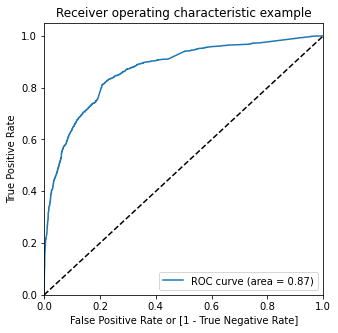

In [93]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

In [94]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.619189,1,1,1,1,1,1,1,1,0,0,0
1,0,0.099282,0,1,0,0,0,0,0,0,0,0,0
2,0,0.904519,1,1,1,1,1,1,1,1,1,1,1
3,0,0.098215,0,1,0,0,0,0,0,0,0,0,0
4,0,0.606901,1,1,1,1,1,1,1,1,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.585577,0.963762,0.347112
0.2,0.2,0.747441,0.892508,0.655969
0.3,0.3,0.779562,0.848127,0.736329
0.4,0.4,0.793103,0.732899,0.831065
0.5,0.5,0.800976,0.659609,0.890116
0.6,0.6,0.790899,0.581840,0.922721
0.7,0.7,0.773264,0.497557,0.947112
0.8,0.8,0.753267,0.403909,0.973556
0.9,0.9,0.710124,0.268322,0.988703


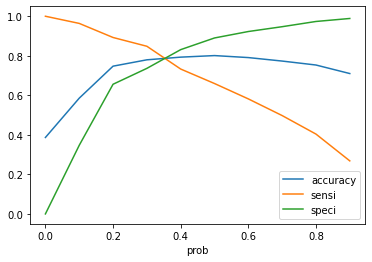

In [96]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the graph it is visible that the optimal cut off is at 0.35.

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.619189,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.099282,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.904519,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.098215,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.606901,1,1,1,1,1,1,1,1,0,0,0,1


In [98]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7960951031333648

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3038,  857],
       [ 438, 2018]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.8216612377850163

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.77997432605905

##### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## 8. Prediction on Test set

In [103]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [104]:
# Substituting all the columns in the final train model
colum = X_train.columns

In [105]:
# Select the columns in X_train for X_test as well
X_test = X_test[colum]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[colum])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Specialization_not provided,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8308,1.0,0.416813,1,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.001320,1,0,0,0,0,1,0,0,0,0,0
2085,1.0,0.000000,0,1,1,0,1,0,0,1,0,0,0
4048,1.0,0.617077,1,0,0,0,0,0,0,0,0,0,0
4790,1.0,0.005282,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0,0,0,0,0,0,0,0,1,0,0
8179,1.0,0.148768,1,0,0,0,0,0,0,0,1,0,0
6236,1.0,0.000000,0,0,0,0,1,0,0,1,0,0,0
5240,1.0,0.458627,1,0,0,0,0,0,0,0,0,0,0


In [106]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df*100],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Lead_Score'})
y_pred_final.head()

,Converted,Lead_Score
0,0,24.918226
1,1,86.039507
2,1,98.632985
3,1,84.428385
4,0,11.604381


In [107]:
# Making prediction using cut off 40
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 40 else 0)
y_pred_final

,Converted,Lead_Score,final_predicted
0,0,24.918226,0
1,1,86.039507,1
2,1,98.632985,1
3,1,84.428385,1
4,0,11.604381,0
...,...,...,...
2718,1,21.116046,0
2719,0,9.854104,0
2720,0,15.147623,0
2721,1,73.768358,1


In [108]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.792508262945281

In [109]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1442,  302],
       [ 263,  716]], dtype=int64)

In [110]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [111]:
# Calculating the sensitivity
TP/(TP+FN)

0.7313585291113381

In [112]:
# Calculating the specificity
TN/(TN+FP)

0.8268348623853211

##### With the current cut off as 40% we have accuracy, sensitivity of 73% and specificity of around 83%

### 9. Precision-Recall

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3467,  428],
       [ 836, 1620]], dtype=int64)

In [114]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.791015625

In [115]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6596091205211726

##### With the current cut off as 40% we have Precision around 79% and Recall around 65%

### 9.1. Precision and recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

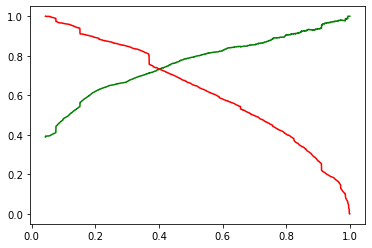

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.619189,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.099282,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.904519,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.098215,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.606901,1,1,1,1,1,1,1,1,0,0,0,1


In [121]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7946780034640214

In [122]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3262,  633],
       [ 671, 1785]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [124]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7382133995037221

In [125]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7267915309446255

#### With the current cut off as 0.41 we have Precision around 74% and Recall around 73%

## 10. Prediction on Test set

In [126]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df*100],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Lead_Score'})
y_pred_final.head()

,Converted,Lead_Score
0,0,24.918226
1,1,86.039507
2,1,98.632985
3,1,84.428385
4,0,11.604381


In [127]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 41 else 0)
y_pred_final

,Converted,Lead_Score,final_predicted
0,0,24.918226,0
1,1,86.039507,1
2,1,98.632985,1
3,1,84.428385,1
4,0,11.604381,0
...,...,...,...
2718,1,21.116046,0
2719,0,9.854104,0
2720,0,15.147623,0
2721,1,73.768358,1


In [128]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7950789570326845

In [129]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1455,  289],
       [ 269,  710]], dtype=int64)

In [130]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [131]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7107107107107107

In [132]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7252298263534218

##### With the current cut off as 0.41 we have Precision around 71% and Recall around 72%